In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

np.set_printoptions(suppress=True, precision=3)

sns.set(style='ticks', palette='Set2')
sns.despine()

In [2]:
c1, c2, c3, c4 = sns.mpl_palette('Set2', 4)
red_queen_color = c1
poisson_color = c2
oracle_color = c3
karimi_color = c4

red_queen_fmt = 's-'
oracle_fmt = 'd-'
poisson_fmt = 'o-'
karimi_fmt = '^-'

In [15]:
%run -i redqueen/utils.py
%run -i redqueen/opt_model.py
%run -i redqueen/opt_runs.py

In [4]:
from IPython.lib import deepreload

In [5]:
sim_opts = SimOpts.std_poisson(world_seed=42, world_rate=1000.0)
mgr = sim_opts.create_manager_with_opt(1)
mgr.run()
df = mgr.state.get_dataframe()
u_int_opt(df, sim_opts=sim_opts)

redqueen/opt_runs.py:174: UserWarning: Consider using `run_dynamic` instead of `run`.
  follower_wall_intensities = wall_intensities


24.2522515977514

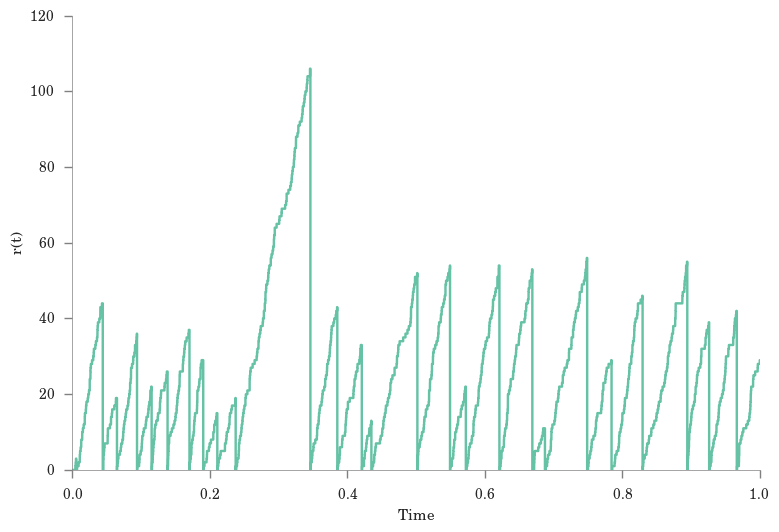

In [6]:
rank_count = rank_of_src_in_df(df, 1)
plt.step(rank_count.index, rank_count.mean(1), where='post')
plt.xlabel('Time')
plt.ylabel('r(t)')
plt.tight_layout()
format_axes(plt.gca())
latexify(fig_width=3.16, largeFonts=True)

In [103]:
[time_in_top_k(df, src_id=x, K=10, sim_opts=sim_opts) for x in sorted(df.src_id.unique())]

[0.25177123510846161, 1.0]

In [20]:
poisson_loss = calc_loss_poisson(df, u_const=u_int_opt(df, sim_opts=sim_opts), src_id=1, sim_opts=sim_opts)

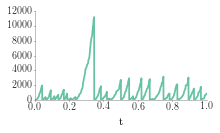

In [105]:
calc_loss_opt(df, sim_opts).plot()
plt.tight_layout()
format_axes(plt.gca())
latexify(columns=1, largeFonts=True)

# Synthetic experiments

In [6]:
Bopt.__file__

'/NL/stackexchange/work/prog/broadcast_ref/broadcast/opt/optimizer.py'

In [7]:
%%time
sim_opts = SimOpts.std_poisson(world_seed=1 + 42, world_rate=10.0).update({ 'end_time': 100.0 })
tmp_kdd = worker_kdd((1, 567.0, 10, sim_opts, None, None), Ks=[1])
tmp_poisson = worker_poisson((1, 567.0, sim_opts, None))
# tmp_oracle = worker_oracle((1, 567.0, 956, sim_opts, None))
# tmp_opt = worker_opt((1, sim_opts, None))

CPU times: user 1.53 s, sys: 2.75 s, total: 4.28 s
Wall time: 550 ms


In [9]:
%%time
sim_opts = SimOpts.std_piecewise_const(world_seed=1 + 42, 
                                       world_rates=np.arange(10) * 1.0,
                                       world_change_times=np.arange(10) * 10.0
                                      ).update({ 'end_time': 100.0 })
tmp_kdd = worker_kdd((1, 567.0, 9, sim_opts, None, None))
tmp_poisson = worker_poisson((1, 567.0, sim_opts, None))
# tmp_oracle = worker_oracle((1, 567.0, 956, sim_opts, None))
tmp_opt = worker_opt((1, sim_opts, None))

CPU times: user 2.86 s, sys: 3.23 s, total: 6.09 s
Wall time: 1.38 s


redqueen/opt_runs.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  intensity_df.pivot_table(values='intensity', index='sink_id', columns='segment')


In [22]:
tmp_kdd, tmp_poisson #, tmp_oracle, tmp_opt

({'avg_rank': 71.168424997482049,
  'avg_rank_1': 71.168424997482049,
  'avg_rank_10': 203.34746746143995,
  'avg_rank_20': 208.60555404195742,
  'avg_rank_3': 88.882515078230256,
  'avg_rank_5': 138.87975916174446,
  'avg_rank_k': 1,
  'kdd_opt_1': array([ 35.553,  33.872,  41.65 ,  58.911,  61.168,  76.685,  78.884,
          84.785,  95.492]),
  'kdd_opt_10': array([ 385.379,   22.145,   22.145,   22.147,   22.151,   22.296,
           22.42 ,   22.99 ,   25.327]),
  'kdd_opt_20': array([ 388.172,   22.353,   22.353,   22.353,   22.353,   22.353,
           22.353,   22.353,   22.353]),
  'kdd_opt_3': array([ 163.163,   16.859,   23.384,   39.962,   42.334,   60.521,
           63.277,   71.067,   86.432]),
  'kdd_opt_5': array([ 306.464,   10.498,   13.798,   24.602,   26.293,   39.132,
           41.16 ,   46.851,   58.203]),
  'kdd_opt_iters_1': 284,
  'kdd_opt_iters_10': 26815,
  'kdd_opt_iters_20': 27311,
  'kdd_opt_iters_3': 3988,
  'kdd_opt_iters_5': 15615,
  'r_2': 201.78194

In [10]:
%%time
sim_opts= SimOpts.std_hawkes(world_seed=1 + 42, world_lambda_0=1000.0, world_alpha=1.0, world_beta=10.0)
mgr = sim_opts.create_manager_for_wall()
mgr.run()

redqueen/opt_runs.py:174: UserWarning: Consider using `run_dynamic` instead of `run`.
  follower_wall_intensities = wall_intensities


CPU times: user 453 ms, sys: 6.67 ms, total: 460 ms
Wall time: 456 ms


In [13]:
%%time
# sim_opts = SimOpts.std_hawkes(world_seed=1 + 42, world_lambda_0=1000.0, world_alpha=1.0, world_beta=10.0)
# worker_kdd((1, 3, 100.0, 10, sim_opts, None, None))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.5 µs


In [3]:
# %%time
# import itertools as I
# sim_opts = SimOpts(other_sources=[Poisson2(src_id=2, seed=seed, rate=1000.0)], 
#                    end_time=100.0, 
#                    src_id=1,
#                    q_vec=q_vec,
#                    s=s,
#                    sink_ids=[1001],
#                    edge_list=[(1, 1001), (2, 1001)])

# with mp.Pool() as pool:
#     N = 10
#     K = 10
#     seeds = range(0, N)
#     seed_capacity = [None] * N
#     opt_top_k_perf = [None] * N
#     for idx, opt_dict in enumerate(pool.map(worker_top_k_opt,
#                                             [(s, K, SimOpts.std_poisson(world_seed=s, world_rate=1000.0), None)
#                                             for s in seeds])):
#         seed_capacity[idx] = opt_dict['capacity']
#         opt_top_k_perf[idx] = opt_dict['perf']
    
#     poisson_top_k_perf = [None] * N
#     for idx, poisson_dict in enumerate(pool.map(worker_top_k_poisson,
#                                                 [(s, K, seed_capacity[idx], 
#                                                   SimOpts.std_poisson(world_seed=s, world_rate=1000.0), None)
#                                                  for idx, s in enumerate(seeds)])):
#         poisson_top_k_perf[idx] = poisson_dict['perf']

NameError: name 'seed' is not defined

# Inference new

In [469]:
import warnings

In [8]:
import pickle
import seqfile

In [16]:
%%time

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    poisson_res_2 = run_inference_queue(opts=poisson_inf_opts)
    hawkes_res_2 = run_inference_queue(opts=hawkes_inf_opts)
    piecewise_res_2 = run_inference_queue(opts=piecewise_inf_opts)

*** 2018-03-31 02:47:47.509606 Checkpoint: active_procs = 220, procs = [('Opt', 38), ('Poisson', 60), ('Oracle', 61), ('kdd', 61)]
*** 2018-03-31 02:47:47.557850 Checkpoint: active_procs = 230, procs = [('Opt', 32), ('Poisson', 64), ('Oracle', 67), ('kdd', 67)]
*** 2018-03-31 02:47:47.635034 Checkpoint: active_procs = 240, procs = [('Opt', 27), ('Poisson', 69), ('Oracle', 72), ('kdd', 72)]
*** 2018-03-31 02:47:47.990243 Checkpoint: active_procs = 250, procs = [('Opt', 21), ('Poisson', 73), ('Oracle', 78), ('kdd', 78)]
*** 2018-03-31 02:47:48.365106 Checkpoint: active_procs = 260, procs = [('Opt', 15), ('Poisson', 77), ('Oracle', 84), ('kdd', 84)]
*** 2018-03-31 02:47:48.387391 Checkpoint: active_procs = 260, procs = [('Opt', 14), ('Poisson', 76), ('Oracle', 85), ('kdd', 85)]
*** 2018-03-31 02:47:48.399989 Checkpoint: active_procs = 270, procs = [('Opt', 10), ('Poisson', 80), ('Oracle', 90), ('kdd', 90)]
*** 2018-03-31 02:47:48.745565 Checkpoint: active_procs = 270, procs = [('Opt', 0),

*** 2018-03-31 02:55:56.185044 Checkpoint: active_procs = 50, procs = [('Opt', 0), ('Poisson', 1), ('Oracle', 47), ('kdd', 2)]
*** 2018-03-31 02:56:37.604176 Checkpoint: active_procs = 40, procs = [('Opt', 0), ('Poisson', 0), ('Oracle', 40), ('kdd', 0)]
*** 2018-03-31 02:57:00.032132 Checkpoint: active_procs = 30, procs = [('Opt', 0), ('Poisson', 0), ('Oracle', 30), ('kdd', 0)]
*** 2018-03-31 02:57:45.678050 Checkpoint: active_procs = 20, procs = [('Opt', 0), ('Poisson', 0), ('Oracle', 20), ('kdd', 0)]
*** 2018-03-31 02:58:21.721279 Checkpoint: active_procs = 10, procs = [('Opt', 0), ('Poisson', 0), ('Oracle', 10), ('kdd', 0)]
*** 2018-03-31 02:59:52.747566 Checkpoint: active_procs = 0, procs = [('Opt', 0), ('Poisson', 0), ('Oracle', 0), ('kdd', 0)]
*** 2018-03-31 02:59:53.776968 Checkpoint: active_procs = 210, procs = [('Opt', 44), ('Poisson', 54), ('Oracle', 56), ('kdd', 56)]
*** 2018-03-31 02:59:53.785880 Checkpoint: active_procs = 210, procs = [('Opt', 42), ('Poisson', 54), ('Oracl

In [9]:
def strip_sim_opts_from_raw_results(d):
    def rm_sim_opts(d_in):
        return {k: v for k, v in d_in.items() if k != 'sim_opts'}
    
    return {k: (v if k != 'raw_results' else [rm_sim_opts(x) for x in v]) 
            for k, v in poisson_res._get_dict().items()}
    

In [60]:
tmp = strip_sim_opts_from_raw_results(poisson_res._get_dict())

In [61]:
tmp.keys()

dict_keys(['capacities', 'raw_results', 'df'])

In [62]:
tmp['raw_results'][1].keys()

dict_keys(['world_events', 'capacity', 'seed', 'r_2', 'top_3', 'avg_rank', 'type', 's', 'num_events', 'top_5', 'top_1', 'top_20', 'top_10'])

In [219]:
with open(seqfile.findNextFile(prefix='synthetic-', suffix='.pickle'), 'wb') as pickle_file:
    pickle.dump({'poisson': strip_sim_opts_from_raw_results(poisson_res._get_dict()), 
                 'hawkes': strip_sim_opts_from_raw_results(hawkes_res._get_dict()), 
                 'piecewise': strip_sim_opts_from_raw_results(piecewise_res._get_dict())}, pickle_file)
    print('Wrote {}'.format(pickle_file.name))

Wrote ./synthetic-6.pickle


In [460]:
defined = False
try:
    poisson_res, hawkes_res, piecewise_res
    defined = True
except NameError:
    pass

confirmation = 'y'

if defined:
     confirmation = input('Some variables are already defined. Are you sure you want to clobber them? [Y/n]')
    
if confirmation.lower().startswith('y'):
    with open('synthetic-6.pickle', 'rb') as pickle_file:
        reloaded = pickle.load(pickle_file)

    poisson_res = Options(**reloaded['poisson'])
    hawkes_res = Options(**reloaded['hawkes'])
    piecewise_res = Options(**reloaded['piecewise'])
else:
    print('Cloberring averted.')

In [100]:
# tmp = piecewise_res.df.pivot_table(index='s', columns='type', values='top_1', aggfunc=np.mean)

In [101]:
# tmp['capacities'] = [np.mean([y for x, y in piecewise_res.capacities[s]]) for s in tmp.index]

In [102]:
# tmp['Opt/Oracle'] = tmp['Opt'] / tmp['Oracle']

In [26]:
# poisson_res.raw_results[0]

In [27]:
# piecewise_res.capacities[piecewise_res.df.s[0]]

In [28]:
# tmp = [x for x in raw_results if x['type'] == 'kdd']

In [30]:
# sim_opts = SimOpts.std_poisson(world_seed=tmp[idx]['seed'], world_rate=world_rate)
# mgr = sim_opts.create_manager_for_piecewise_const(tmp[idx]['seed'], np.arange(num_segments) * (T / num_segments), 
#                                                   tmp[idx]['kdd_opt'] / (T / num_segments))
# mgr.run()

In [126]:
# df = mgr.state.get_dataframe()

In [127]:
# df[df.src_id == 1].shape

(933, 5)

In [19]:
# world_changing_rates = np.array([ 6872.701,  9753.572,  8659.97 ,  7993.292,  5780.093,  5779.973, 5290.418,  9330.881,  8005.575,  8540.363])

In [31]:
# %%time
# sim_opts = SimOpts.std_piecewise_const(world_seed=1, 
#                                        world_change_times=world_change_times,
#                                        world_rates=world_changing_rates  / 10.0)

In [54]:
# opt_oracle=find_opt_oracle(50.0, sim_opts, verbose=True)

*** 2018-03-31 11:06:59.177817 Checkpoint: q_lo = 1.0, q_hi = 2.0, num_events = 62 
*** 2018-03-31 11:07:06.825671 Checkpoint: q_lo = 2.0, q_hi = 4.0, num_events = 50 


In [56]:
# oracle_df = opt_oracle['df']
# rb_mgr = sim_opts.create_manager_with_times(oracle_df.t[oracle_df.events == 1] + 1e-10)
# rb_mgr.run_dynamic()
# df = rb_mgr.state.get_dataframe()
# time_in_top_k(rb_mgr.state.get_dataframe(), K=3, sim_opts=sim_opts) 

0.23083736386486994

In [197]:
# oracle_rank_calc = rank_of_src_in_df(df=df, src_id=1)

In [166]:
# (df.src_id == 1).sum()

50

In [37]:
# %%time
# q_opt = find_opt_oracle_q(100, sim_opts, verbose=True)

CPU times: user 9.01 s, sys: 0 ns, total: 9.01 s
Wall time: 9 s


In [38]:
# q_opt

1.0

In [41]:
# %%time
# oracle_df = get_oracle_df(sim_opts.update({'q': q_opt}))

CPU times: user 8.73 s, sys: 0 ns, total: 8.73 s
Wall time: 8.72 s


In [46]:
# sim_opts = SimOpts.std_poisson(world_seed=42, world_rate=1000)

In [49]:
# %%time
# # sim_opts = sim_opt_gen(0)
# wall_mgr = sim_opts.create_manager_for_wall()
# wall_mgr.run_dynamic()
# oracle_df = oracle_ranking(df=wall_mgr.state.get_dataframe(), 
#                            sim_opts=sim_opts)

CPU times: user 8.09 s, sys: 0 ns, total: 8.09 s
Wall time: 8.08 s


In [52]:
@optioned(option_arg='opts')
def rank_plot(res, field, file_name, title=None, with_std=True, save=False, log_y=True, legend=False, fig_width=None, end_time=None):
    assert end_time is not None, "end_time must be specified."
    vals = res.df.pivot_table(index='q', columns='type', values=field, aggfunc=np.mean) / end_time
    std  = res.df.pivot_table(index='q', columns='type', values=field, aggfunc=np.std) / end_time
    
    if title is None:
        if field == 'avg_rank':
            title = 'Avg. rank'
        elif field == 'r_2':
            title = r'$\int r^2$dt'
        else:
            title = 'Unknown axis'
            
    if fig_width is None:
        fig_width = 1.75
        
    latexify(fig_width=fig_width, largeFonts=False)
    c1, c2, c3, c4 = sns.mpl_palette('Set2', 4)

    X = [np.mean(res.capacities[s]) for s in vals.index]
    plt.errorbar(X, vals.Opt, fmt='s-', yerr=std.Opt.values, label='RedQueen',  color=red_queen_color, markersize=3, linewidth=0.75)
    # plt.errorbar(X, vals.Poisson, fmt='o-', yerr=std.Poisson.values, label='Poisson', color=poisson_color, markersize=3, linewidth=0.75)
    plt.errorbar(X, vals.Oracle, fmt='d-', yerr=std.Oracle.values, label='Oracle', color=oracle_color, markersize=3, linewidth=0.75)
    plt.errorbar(X, vals.kdd, fmt='^-', yerr=std.kdd.values, label='Karimi', color=karimi_color, markersize=3, linewidth=0.75)
    
    plt.xscale('log')
    
    if log_y:
        plt.yscale('log')
        plt.yticks([10 ** i for i in [-1, 0, 1, 2]])
    
    if legend:
        plt.legend(loc="upper right")
        
    # plt.ylabel(title)
    plt.xlabel(r'Budget')
    # plt.ylim(None, 105)
    plt.xlim(4.5, None)
    plt.tight_layout()
    format_axes(plt.gca())
    
    if save:
        plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
        
    # plt.savefig('/NL/stackexchange/work/prog/papers/online-twitter-broadcast/nips2016/figures/capacity-poisson-oracle-opt.pdf')
    # plt.savefig('/NL/stackexchange/work/prog/papers/online-twitter-broadcast/nips2016/figures/capacity-poisson-oracle-opt-kdd.pdf')

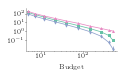

In [53]:
rank_plot(hawkes_res_2, 'avg_rank', None, log_y=True, end_time=simulation_opts.T)

## Legend

### With Oracle

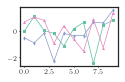

In [58]:
fig = plt.figure()
figlegend = plt.figure(figsize=(4 * 2.0, 0.25))
ax = fig.add_subplot(111)
lines = [
    ax.plot(range(10), np.random.randn(10), red_queen_fmt, color=red_queen_color, markersize=3, linewidth=0.75)[0], 
    ax.plot(range(10), np.random.randn(10), oracle_fmt, color=oracle_color, markersize=3, linewidth=0.75)[0],
    ax.plot(range(10), np.random.randn(10), karimi_fmt, color=karimi_color, markersize=3, linewidth=0.75)[0]
]
figlegend.legend(tuple(lines), (r'\textsc{RedQueen}', 'Oracle', 'Karimi'), 'center', ncol=3)
# figlegend.savefig('/NL/stackexchange/work/prog/papers/online-twitter-broadcast/wsdm2017/FIG/legend-with-oracle.pdf', 
#                   bbox_inches='tight', pad_inches=0)

### With Poisson

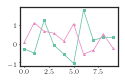

In [59]:

fig = plt.figure()
figlegend = plt.figure(figsize=(4 * 2.0, 0.25))
ax = fig.add_subplot(111)
lines = [
    ax.plot(range(10), np.random.randn(10), red_queen_fmt, color=red_queen_color, markersize=3, linewidth=0.75)[0], 
    # ax.plot(range(10), np.random.randn(10), poisson_fmt, color=poisson_color, markersize=3, linewidth=0.75)[0],
    ax.plot(range(10), np.random.randn(10), karimi_fmt, color=karimi_color, markersize=3, linewidth=0.75)[0]
]
#figlegend.legend(tuple(lines), (r'\textsc{RedQueen}', 'Poisson', 'Karimi'), 'center', ncol=3)
figlegend.legend(tuple(lines), (r'\textsc{RedQueen}', 'Karimi'), 'center', ncol=2)
# figlegend.savefig('/NL/stackexchange/work/prog/papers/online-twitter-broadcast/wsdm2017/FIG/legend-with-poisson.pdf', 
#                   bbox_inches='tight', pad_inches=0)

In [168]:
# hawkes_res_higher_beta.df.pivot_table(index='s', columns='type', values='r_2', aggfunc=np.std)

type,Opt,Oracle,Poisson,kdd
s,,,,
1.000000e-08,0.004255,0.002257,0.377543,0.228007
1.000000e-07,0.013699,0.006435,0.708564,0.571351
1.000000e-06,0.058041,0.013762,1.468919,1.378015
1.000000e-05,0.229522,0.074677,4.076188,4.230126
1.000000e-04,0.866249,0.287207,9.320475,16.104886
1.000000e-03,3.766542,0.898753,25.476946,281.915090
1.000000e-02,16.224040,4.240223,87.953591,1259.529470
1.000000e-01,55.644573,20.417019,232.210492,2758.889224
1.000000e+00,218.081889,93.121546,1806.676547,10281.882413


In [61]:
# rank_plot(piecewise_res, 'avg_rank', None, legend=True, fig_width=8)

NameError: name 'piecewise_res' is not defined

In [66]:
@optioned(option_arg='opts')
def top_k_plot(res, field, file_name, K=None, with_std=True, save=False, 
               legend=False, fig_width=None, largeFonts=False):
    vals = res.df.pivot_table(index='q', columns='type', values=field, aggfunc='mean')
    std  = res.df.pivot_table(index='q', columns='type', values=field, aggfunc=np.std)
    
    if K is None:
        assert field.startswith('top_')
        K = int(field[len('top_'):])

    if fig_width is None:
        fig_width = 1.75
        
    latexify(fig_width=fig_width, largeFonts=largeFonts)
    c1, c2, c3, c4 = sns.mpl_palette('Set2', 4)

    X = [np.mean(res.capacities[s]) for s in vals.index]
    plt.errorbar(X, vals.Opt, fmt=red_queen_fmt, yerr=std.Opt.values, label=r'\textsc{RedQueen}',  
                 color=red_queen_color, markersize=3, linewidth=0.75)
    # plt.errorbar(X, vals.Poisson, fmt=poisson_fmt, yerr=std.Poisson.values, label='Poisson', 
    #              color=poisson_color, markersize=3, linewidth=0.75)
    plt.errorbar(X, vals.Oracle, fmt=oracle_fmt, yerr=std.Oracle.values, label='Oracle',
                 color=oracle_color, markersize=3, linewidth=0.75)
    plt.errorbar(X, vals.kdd, fmt=karimi_fmt, yerr=std.kdd.values, label='Karimi', 
                 color=karimi_color, markersize=3, linewidth=0.75)
    plt.xscale('log')
    if legend:
        plt.legend(loc="upper left")
    # plt.ylabel(r'$\int {{I}}(r(t) < {})dt$'.format(K))
    plt.xlabel(r'Budget')
    plt.ylim(-5, 105)
    plt.yticks([0, 50, 100])
    plt.xlim(4.5, None)
    plt.tight_layout()
    format_axes(plt.gca())
    if save:
        plt.savefig(file_name, bbox_inches='tight', pad_inches=0)

In [64]:
piecewise_res_2.df.pivot_table(index='q', columns='type', values='top_1')

type,Opt,Oracle,Poisson,kdd
q,,,,
1.000000e-04,93.345349,99.660187,47.966030,48.181728
1.668101e-03,78.889262,97.282474,43.693084,43.458128
2.782559e-02,54.291271,83.206772,34.772634,34.490786
4.641589e-01,31.186412,52.643343,23.482270,23.466532
7.742637e+00,16.288967,30.891380,13.852873,13.682464
1.291550e+02,8.368097,17.117852,7.922070,7.704958
2.154435e+03,4.195675,9.995241,4.388770,4.765749
3.593814e+04,2.115764,4.792608,2.453178,2.600518
5.994843e+05,1.184343,2.765323,1.318151,1.456269


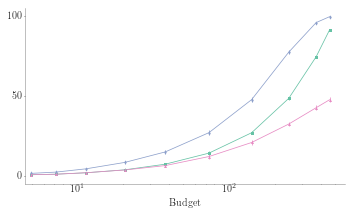

In [67]:
top_k_plot(poisson_res_2, 'top_1', '/tmp/test.pdf', save=False, fig_width=5, largeFonts=True)

In [250]:
tmp = poisson_res_2.df
tmp[tmp.type == 'Poisson'].describe()

,avg_rank,num_events,r_2,s,seed,top_1,top_5,world_events
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3775.626447,271.450000,930276.062968,1063771.421300,4.500000,16.792321,45.866765,998.400000
std,6877.641685,318.522294,3746813.663833,2999066.878561,2.886751,17.185526,36.256616,24.631424
min,101.417892,0.000000,286.276565,0.000100,0.000000,0.000000,0.525209,956.000000
25%,205.294872,18.750000,1026.565139,0.027826,2.000000,1.726655,9.158226,980.000000
50%,937.210705,102.000000,17952.364853,68.448802,4.500000,8.554189,38.553385,993.500000
75%,4467.226670,494.750000,355991.808174,35938.136638,7.000000,32.230900,85.744226,1022.000000
max,51602.111467,963.000000,34894547.293472,10000000.000000,9.000000,49.635027,97.436874,1035.000000


In [251]:
tmp = hawkes_res_2.df
tmp[tmp.type == 'Poisson'].describe()

,avg_rank,num_events,r_2,s,seed,top_1,top_5,world_events
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4620.816542,301.930000,1435908.914914,1063771.421300,4.500000,16.515543,44.783209,1155.500000
std,8514.776225,360.750124,5029173.581471,2999066.878561,2.886751,17.136917,36.462044,33.881105
min,94.909487,0.000000,281.466563,0.000100,0.000000,0.000000,0.138730,1113.000000
25%,217.732407,20.500000,1139.069265,0.027826,2.000000,1.706495,9.025254,1126.000000
50%,1071.553104,111.500000,23536.617241,68.448802,4.500000,8.259371,36.931077,1147.000000
75%,4980.140291,529.500000,416858.523927,35938.136638,7.000000,30.852401,85.071333,1198.000000
max,56634.343917,1087.000000,42792074.660449,10000000.000000,9.000000,51.374306,97.641337,1207.000000


In [253]:
tmp = piecewise_res_2.df
tmp[tmp.type == 'Poisson'].describe()

,avg_rank,num_events,r_2,s,seed,top_1,top_5,world_events
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2999.325583,220.010000,565300.529805,1063771.421300,4.500000,18.048286,48.686186,754.700000
std,5323.113679,249.077023,2132068.274656,2999066.878561,2.886751,17.429374,35.935099,25.085913
min,93.517316,0.000000,245.415447,0.000100,0.000000,0.000000,0.565336,715.000000
25%,184.210533,18.000000,865.050901,0.027826,2.000000,2.726000,12.729771,736.000000
50%,763.677975,93.500000,13713.628282,68.448802,4.500000,11.058082,45.657781,749.000000
75%,3559.701735,412.500000,210573.253905,35938.136638,7.000000,34.647645,88.574192,776.000000
max,39128.203550,743.000000,19743325.457668,10000000.000000,9.000000,50.042244,98.029689,799.000000


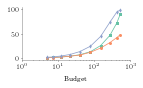

In [249]:
top_k_plot(hawkes_res_2, 'top_1', None)

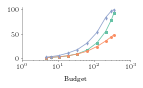

In [252]:
top_k_plot(piecewise_res_2, 'top_1', '/tmp/test.pdf', save=False)

## Plots

In [ ]:
import os
# base = '/NL/stackexchange/work/prog/papers/online-twitter-broadcast/nips2016/figures/'

In [ ]:
poisson_res.raw_results[0]

In [1451]:
%%time
plot_base = '/NL/stackexchange/work/prog/papers/online-twitter-broadcast/wsdm2017/FIG/'
for name, res in [('poisson', poisson_res_2), ('hawkes', hawkes_res_2)]: # , ('piecewise', piecewise_res_2)]:
    file_name = os.path.join(plot_base, 'avg-rank-{}-wall.pdf'.format(name))
    rank_plot(res, 'avg_rank', file_name, save=True, end_time=simulation_opts.T)
    plt.close()
    
    file_name = os.path.join(plot_base, 'r2-{}-wall.pdf'.format(name))
    rank_plot(res, 'r_2', file_name, save=True, end_time=simulation_opts.T)
    plt.close()
    
    file_name = os.path.join(plot_base, 'r2-{}-wall-linear.pdf'.format(name))
    rank_plot(res, 'r_2', file_name, save=True, log_y=False, end_time=simulation_opts.T)
    plt.close()
    
    file_name = os.path.join(plot_base, 'avg-rank-{}-wall-linear.pdf'.format(name))
    rank_plot(res, 'avg_rank', file_name, save=True, log_y=False, end_time=simulation_opts.T)
    plt.close()
    
    for k in [1]:
        file_name = os.path.join(plot_base, 'top-{}-{}-wall.pdf'.format(k, name))
        top_k_plot(res, 'top_{}'.format(k), file_name, save=True)
        plt.close()

CPU times: user 10.3 s, sys: 47.5 s, total: 57.7 s
Wall time: 1min 55s


In [70]:
poisson_res_2.df.iloc[392, :]

avg_rank        4325.24
num_events           10
q                599484
r_2              265292
seed                  2
top_1           2.33567
type             Oracle
world_events       1035
Name: 392, dtype: object

In [68]:
simulation_opts.world_beta

10.0

In [71]:
%%time
def plot_intensity(sim_opts, name):
    wall_mgr = sim_opts.create_manager_for_wall()
    wall_mgr.run()
    assert len(wall_mgr.sources) == 1
    broadcaster = wall_mgr.sources[0]
    X = np.linspace(start=0, stop=sim_opts.end_time, num=100)
    Y = [broadcaster.get_rate(t) for t in X]
    latexify(columns=1, largeFonts=False)
    plt.plot(X, Y)
    plt.xlabel('Time')
    plt.ylabel(r'$\lambda(t)$')
    plt.title('Sample intensity of {} wall'.format(name))
    plt.tight_layout()
    format_axes(plt.gca())

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 20 µs


redqueen/opt_runs.py:174: UserWarning: Consider using `run_dynamic` instead of `run`.
  follower_wall_intensities = wall_intensities


CPU times: user 3.07 s, sys: 1.24 s, total: 4.31 s
Wall time: 24.3 s


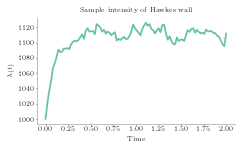

In [72]:
%%time
plot_intensity(SimOpts.std_hawkes(world_seed=1, 
                                  world_beta=10, 
                                  world_alpha=1, 
                                  world_lambda_0=1000).update({'end_time': 2}),
               'Hawkes')

redqueen/opt_runs.py:174: UserWarning: Consider using `run_dynamic` instead of `run`.
  follower_wall_intensities = wall_intensities


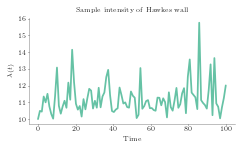

In [73]:
plot_intensity(hawkes_inf_opts.sim_opts_gen(5), 'Hawkes')
# plt.savefig(os.path.join(plot_base, 'hawkes_intensity.pdf'), bbox_inches='tight', pad_inches=0)

redqueen/opt_runs.py:174: UserWarning: Consider using `run_dynamic` instead of `run`.
  follower_wall_intensities = wall_intensities


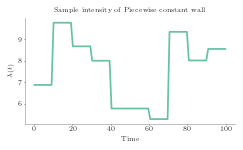

In [74]:
plot_intensity(piecewise_inf_opts.sim_opts_gen(5), 'Piecewise constant')
# plt.savefig(os.path.join(plot_base, 'piecewise_const_intenstiy.pdf'),  bbox_inches='tight', pad_inches=0)

## Compare against Mohammed's method

In [75]:
import broadcast.data as Bdata
import broadcast.opt.optimizer as Bopt

In [76]:
reload(Bopt)

NameError: name 'reload' is not defined

In [78]:
world_rate = 1.0
num_segments = 10
K = 1
T = 1000.0

rs = np.random.RandomState(42)
low_high_ratio = 0.75
world_rates = rs.uniform(low=world_rate * (1 - low_high_ratio),
                         high=world_rate * (1 + low_high_ratio), 
                         size=num_segments)

# wall_mgr = (SimOpts.std_poisson(world_rate=world_rate, world_seed=0)
sim_opts = (SimOpts.std_piecewise_const(world_seed=1, world_rates=world_rates, 
                                        world_change_times=np.arange(num_segments) / num_segments * T)
            .update({ 'end_time': T }))
wall_mgr = sim_opts.create_manager_for_wall()
wall_mgr.run_dynamic()

wall_df = wall_mgr.state.get_dataframe()
wall_intensities = wall_df.groupby((wall_df.t.values / T * num_segments).astype(int)).size() / (T / num_segments)
# wall_intensities = np.asarray([1000] * num_segments)
# wall_intensities = world_rates

follower_wall_intensities = np.array([wall_intensities])
follower_conn_prob = np.array([[1.0] * num_segments])
follower_weights = np.array([1.0])

def _util(x):
    return Bopt.utils.weighted_top_k(x, follower_wall_intensities, follower_conn_prob, follower_weights, K)

def _util_grad(x):
    return Bopt.utils.weighted_top_k_grad(x, follower_wall_intensities, follower_conn_prob, follower_weights, K)

x0 = np.ones(num_segments)
budget = 100.0
upper_bounds = np.array([1e6] * num_segments)
threshold=0.005 # Relative tolerance for convergence

kdd_opt = Bopt.optimize(util=_util, 
                        util_grad=_util_grad, 
                        budget=budget, 
                        upper_bounds=upper_bounds, 
                        threshold=threshold, 
                        x0=x0, verbose=True)

Done within 5 iterations!


In [80]:
kdd_opt

array([ 13.006,  11.875,  11.446,  10.409,   7.556,   7.694,   6.336,
        10.98 ,  10.131,  10.566])

In [81]:
Bopt.utils.weighted_top_k(kdd_opt, follower_wall_intensities, follower_conn_prob, follower_weights, K)

9.0242120830208741

## Find the `q`which provides a certain capacity

In [98]:
%run -i redqueen/utils.py

In [99]:
%%time
sim_opts = SimOpts(**{ 
        'src_id': 1,
        'end_time': 100.0,
        's': np.asarray([1.0]),
        'other_sources': [(Poisson, {'src_id': 2, 'seed': 1, 'rate': 10000.0})],
        'q': 1.0,
        'sink_ids': [1001],
        'edge_list': [(1, 1001), (2, 1001)]
    })
# tmp = calc_q_capacity_iter(sim_opts)
tmp3_poisson_1 = calc_q_capacity_iter(sim_opts, q=sim_opts.q)

CPU times: user 96.7 ms, sys: 130 ms, total: 227 ms
Wall time: 53.9 s


In [100]:
tmp3_poisson_1.mean()

7961.1676131321292

In [36]:
%%time
sim_opts = SimOpts(**{ 
        'src_id': 1,
        'end_time': 100.0,
        's': np.asarray([1.0]),
        'other_sources': [(Poisson2, {'src_id': 2, 'seed': 1, 'rate': 10000.0})],
        'q': 1.0,
        'sink_ids': [1001],
        'edge_list': [(1, 1001), (2, 1001)]
    })
# tmp = calc_q_capacity_iter(sim_opts)
tmp3_poisson_2 = calc_s_capacity_iter(sim_opts, q=sim_opts.q)

CPU times: user 50 ms, sys: 33.3 ms, total: 83.3 ms
Wall time: 1min 40s


In [37]:
tmp3_poisson_2.mean()

7952.9203030817316

In [38]:
%%time
tmp2 = calc_s_capacity_iter(sim_opts, q=sim_opts.q, parallel=True)

CPU times: user 56.7 ms, sys: 33.3 ms, total: 90 ms
Wall time: 1min 46s


In [53]:
%run -i redqueen/utils.py
%run -i redqueen/opt_model.py

In [22]:
%%time
tmp4 = calc_s_capacity_iter(sim_opts, q=2.0, parallel=True)

CPU times: user 100 ms, sys: 107 ms, total: 207 ms
Wall time: 1min 5s


In [104]:
tmp4.mean()

2110.2250458304434

In [23]:
tmp4.mean()

9469.9358011555705

In [52]:
sim_opts = SimOpts(**{ 
        'src_id': 1,
        'end_time': 100.0,
        's': np.asarray([1.0]),
        # 'other_sources': [Poisson2(src_id=2, seed=1, rate=10000.0)],
        'other_sources': [(Poisson, {'src_id': 2, 'seed': 1, 'rate': 10000.0})],
        'q': 1.0,
        'sink_ids': [1001],
        'edge_list': [(1, 1001), (2, 1001)]
    })

In [148]:
%%time
q_opt = sweep_q(lambda: SimOpts.std_poisson(world_seed=1, world_rate=100.0), capacity_cap=100.0, verbose=True)

*** 2016-05-04 21:59:44.864163 Checkpoint: Initial capacity = 769.0321811055888
*** 2016-05-04 22:00:06.321337 Checkpoint: s_hi = 4096.0, s_lo = 2048.0
*** 2016-05-04 22:00:07.986757 Checkpoint: new_capacity = 106.16027670602416, s = 3072.0
*** 2016-05-04 22:00:09.666732 Checkpoint: new_capacity = 101.194622540465, s = 3584.0
*** 2016-05-04 22:00:11.336612 Checkpoint: new_capacity = 99.42532014279948, s = 3840.0
CPU times: user 210 ms, sys: 2.12 s, total: 2.33 s
Wall time: 28.5 s


In [63]:
%%time
q_opt = sweep_q(SimOpts.std_poisson(world_seed=1, world_rate=100.0), capacity_cap=50.0, verbose=True)

*** 2018-03-29 14:32:24.093781 Checkpoint: q_init = 0.0005753494376300199
*** 2018-03-29 14:32:24.288492 Checkpoint: Initial capacity = 40.60789581578206, target capacity = 50.0, q_init = 0.0005753494376300199
*** 2018-03-29 14:32:24.475561 Checkpoint: q = 0.0002876747188150099, capacity = 44.185028335018124
*** 2018-03-29 14:32:24.660886 Checkpoint: q = 0.00014383735940750496, capacity = 49.87523537642429
CPU times: user 73.3 ms, sys: 213 ms, total: 287 ms
Wall time: 603 ms


In [149]:
q_opt

3840.0

In [239]:
%%time
# This is with Poisson: Took ~ 47min, 44s
s_opt = sweep_s(sim_opts, 50000.0, verbose=True)

*** 2016-05-02 00:12:20.257822 Checkpoint: Initial capacity = 7967.162987045291
*** 2016-05-02 00:44:22.309096 Checkpoint: s_hi = 0.0009765625, s_lo = 0.00048828125
*** 2016-05-02 00:46:56.892996 Checkpoint: new_capacity = 47736.13035565209, s = 0.000732421875
*** 2016-05-02 00:49:32.194914 Checkpoint: new_capacity = 49913.7414199194, s = 0.0006103515625
*** 2016-05-02 00:52:06.251847 Checkpoint: new_capacity = 51218.96161754592, s = 0.00054931640625
*** 2016-05-02 00:54:41.662719 Checkpoint: new_capacity = 50540.20193159806, s = 0.000579833984375
*** 2016-05-02 00:57:16.650763 Checkpoint: new_capacity = 50224.656253556066, s = 0.0005950927734375
CPU times: user 1.96 s, sys: 2.18 s, total: 4.14 s
Wall time: 47min 44s


In [233]:
%%time
# This was with Poisson2: Took ~ 35min, 24s
s_opt = sweep_s(sim_opts, 50000.0, verbose=True)

*** 2016-05-01 22:57:44.982005 Checkpoint: Initial capacity = 7960.457586400027
*** 2016-05-01 23:21:25.507846 Checkpoint: s_hi = 0.0009765625, s_lo = 0.00048828125
*** 2016-05-01 23:23:19.044300 Checkpoint: new_capacity = 47686.2063074488, s = 0.000732421875
*** 2016-05-01 23:25:12.821979 Checkpoint: new_capacity = 49871.05306762598, s = 0.0006103515625
*** 2016-05-01 23:27:08.958602 Checkpoint: new_capacity = 51169.0749459018, s = 0.00054931640625
*** 2016-05-01 23:29:03.197845 Checkpoint: new_capacity = 50501.14818392287, s = 0.000579833984375
*** 2016-05-01 23:30:57.014591 Checkpoint: new_capacity = 50177.111303157675, s = 0.0005950927734375
CPU times: user 1.58 s, sys: 2.26 s, total: 3.84 s
Wall time: 35min 24s


In [135]:
s_opt

2.5033950805664062e-06

In [132]:
s_opt

2.503393943698029e-06

### Micro-benchmark: fastest poisson

In [201]:
def foo(T):
    rs = np.random.RandomState(42)
    t, dt = 0, 0
    n = 0
    while t + dt < T:
        t = t + dt
        n += 1
        dt = rs.exponential(1 / 1000.0)
    return t, n

def bar(T):
    rs = np.random.RandomState(42)
    n = rs.poisson(1000.0 * T)
    last_time = sorted(rs.uniform(high=T, size=n))[-1]
    return last_time, n


In [204]:
%timeit tmp1 = foo(1000)

1 loop, best of 3: 394 ms per loop


In [205]:
%timeit tmp2 = bar(1000)

1 loop, best of 3: 829 ms per loop


In [206]:
foo(1000), bar(1000)

((999.999833196945, 998932), (999.99831486095445, 999640))

In [245]:
# %%time
# import itertools as I

# def worker(param):
#     return np.sum(range(param * 10000000))

# def foo(params):
#     start, stop = params
#     total = 0
#     with mp.Pool() as pool:
#         for s in pool.imap_unordered(worker, range(start, stop)):
#             total += s
#     return start, stop, total

# # Does not work with 'Pool' class because "daemonic processes are not allowed to have children"
# with mp.pool.ThreadPool() as pool:
#     for start, stop, t in pool.imap_unordered(foo, zip(range(1, 10), range(100, 110))):
#         print('start, stop, t = ', start, stop, t)
        
        
        

KeyboardInterrupt: 

## Multiple followers

Increase the number of followers and see the improvements wrought about by RedQueen.

~~There should be a set of ~ 100 broadcasters and all the followers choose their broadcaster by preferential attachment.~~

In [8]:
import decorated_options as Deco
from opt_runs import make_piecewise_const

In [404]:
%timeit make_piecewise_const(10)

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 641 µs per loop


In [421]:
# tmp_segs = 1000
# tmp_make_piecewise_const = make_piecewise_const(tmp_segs)
# np.asarray(tmp_make_piecewise_const).sum() * 1/tmp_segs * np.pi

1.9997315530842155

In [ ]:
# plt.plot(tmp_make_piecewise_const, 'o-')

In [48]:
# tmp_make_edge_list = make_edge_list(opts=mk_edge_list_opts)

In [49]:
# tmp_make_edge_list[0:5]

[(5037, 1000), (5095, 1000), (5073, 1000), (5059, 1000), (5015, 1000)]

In [80]:
sim_opts = prepare_multiple_followers_sim_opts(num_followers=10, opts=multiple_follower_opts)

In [81]:
len(sim_opts.get_dict()['other_sources'])

10

In [82]:
opt_mgr = sim_opts.create_manager_with_opt(42)

In [83]:
%%time
opt_mgr.run_dynamic()

CPU times: user 5.64 s, sys: 127 ms, total: 5.76 s
Wall time: 5.75 s


In [84]:
opt_df = opt_mgr.get_state().get_dataframe()

In [85]:
wall_df = opt_df[opt_df.src_id != sim_opts.src_id]

In [86]:
T = sim_opts.end_time
num_segments = 24
seg_idx = (wall_df.t.values / T * num_segments).astype(int)
wall_intensities = wall_df.groupby(seg_idx).size() / (T / num_segments)

In [87]:
intensity_df = (wall_df.groupby(['sink_id', pd.Series(seg_idx, name='segment')]).size() / (T / num_segments)).sort_index()

In [88]:
world_intensities = \
    intensity_df.reset_index('segment', name='intensity').reset_index('sink_id').pivot_table(
        values='intensity', index='sink_id', columns='segment').ix[sim_opts.sink_ids[::-1]]

redqueen/opt_runs.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [333]:
opt_df[opt_df.src_id == 1].t.nunique()

791

In [334]:
%%time
poisson_results = worker_poisson((42, float(opt_df[opt_df.src_id == 1].t.nunique()), 
                                  sim_opts, None))

CPU times: user 1.81 s, sys: 50 ms, total: 1.86 s
Wall time: 1.86 s


In [ ]:
poisson_results

In [336]:
%%time
kdd_results = worker_kdd((42, float(opt_df[opt_df.src_id == 1].t.nunique()), 
                          24, sim_opts, world_intensities, None))

CPU times: user 2.13 s, sys: 23.3 ms, total: 2.16 s
Wall time: 2.15 s


utils.py:726: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  follower_weights)


In [ ]:
kdd_results

In [338]:
%%time
opt_results = worker_opt((42, sim_opts, 24, None))

CPU times: user 5.09 s, sys: 83.3 ms, total: 5.17 s
Wall time: 5.17 s


In [ ]:
opt_results

In [101]:
import decorated_options as Deco
import warnings

In [102]:
%%time
new_multiple_follower_opts = \
    Deco.Options(repetitions=200, num_followers_list=list(range(1, 15)),
                 num_segments=24,  # This matches with the number of segments the rate of users is divided in
                 setup_opts=multiple_follower_opts)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    run_multiple = run_multiple_followers(opts=new_multiple_follower_opts)
    run_multiple_df = run_multiple.df

*** 2018-03-31 11:22:08.199274 Checkpoint: active/total = 3798/1000, procs = [('Opt', 1800), ('Poisson', 999), ('kdd', 999)]
*** 2018-03-31 11:23:41.881912 Checkpoint: active/total = 4798/2000, procs = [('Opt', 800), ('Poisson', 1999), ('kdd', 1999)]
*** 2018-03-31 11:24:40.622052 Checkpoint: active/total = 5400/3000, procs = [('Opt', 0), ('Poisson', 2698), ('kdd', 2702)]
*** 2018-03-31 11:27:05.225257 Checkpoint: active/total = 4400/4000, procs = [('Opt', 0), ('Poisson', 2198), ('kdd', 2202)]
*** 2018-03-31 11:29:09.874190 Checkpoint: active/total = 3400/5000, procs = [('Opt', 0), ('Poisson', 1699), ('kdd', 1701)]
*** 2018-03-31 11:30:57.175574 Checkpoint: active/total = 2400/6000, procs = [('Opt', 0), ('Poisson', 1197), ('kdd', 1203)]
*** 2018-03-31 11:32:39.411699 Checkpoint: active/total = 1400/7000, procs = [('Opt', 0), ('Poisson', 695), ('kdd', 705)]
*** 2018-03-31 11:34:29.079916 Checkpoint: active/total = 400/8000, procs = [('Opt', 0), ('Poisson', 186), ('kdd', 214)]
CPU times:

In [104]:
# list(filter(lambda x : x['type'] == 'kdd', run_multiple.raw_results))

In [105]:
run_multiple_df.groupby(['type', 'num_followers']).mean()

avg_rank  num_events      q           r_2    seed  \
type    num_followers                                                         
Opt     1               739.178485     740.450    1.0   9929.478364  4234.0   
        2               758.088181     756.820    4.0  10057.857737  4234.0   
        3               767.843128     770.410    9.0   9974.780727  4234.0   
        4               779.612632     781.875   16.0   9998.569799  4234.0   
        5               791.228205     791.295   25.0  10031.004842  4234.0   
        6               789.648420     790.660   36.0  10003.279903  4234.0   
        7               791.488058     794.075   49.0   9990.471661  4234.0   
        8               791.784455     793.260   64.0   9993.457307  4234.0   
        9               792.629421     794.165   81.0   9980.121863  4234.0   
        10              791.718174     792.205  100.0   9975.372412  4234.0   
        11              791.995977     791.860  121.0   9979.692281  4234.0   
        12              791.373179     790.870  144.0   9987.138560  4234.0   
        13              792.049248     792.570  169.0   9981.199959  4234.0   
        14              792.685469     791.885  196.0   9999.907473  4234.0   
Poisson 1              1345.026473     736.375    1.0  45798.027055  4234.0   
        2              1326.388681     752.315    4.0  43662.814957  4234.0   
        3              1302.113664     766.075    9.0  40603.657258  4234.0   
        4              1288.157546     777.725   16.0  37538.261627  4234.0   
        5              1273.959990     787.125   25.0  33990.291850  4234.0   
        6              1271.609458     786.500   36.0  34124.939228  4234.0   
        7              1265.647739     789.905   49.0  33126.614017  4234.0   
        8              1267.239716     788.675   64.0  33344.388504  4234.0   
        9              1263.871247     790.025   81.0  32870.856437  4234.0   
        10             1265.641916     788.065  100.0  33249.746327  4234.0   
        11             1265.630654     787.480  121.0  33217.620402  4234.0   
        12             1267.182280     786.725  144.0  33584.733011  4234.0   
        13             1265.304407     787.990  169.0  33261.640583  4234.0   
        14             1267.933040     787.280  196.0  33505.811196  4234.0   
kdd     1              1713.980032     737.215    1.0  94956.797307  4234.0   
        2              1693.758075     753.895    4.0  92692.473752  4234.0   
        3              1586.010842     767.060    9.0  75649.157586  4234.0   
        4              1445.380461     778.785   16.0  55062.565491  4234.0   
        5              1302.912902     786.265   25.0  36691.824778  4234.0   
        6              1312.500955     786.875   36.0  37962.514059  4234.0   
        7              1292.959475     789.720   49.0  35586.180911  4234.0   
        8              1298.751045     789.805   64.0  36541.692962  4234.0   
        9              1284.186760     790.085   81.0  34753.283282  4234.0   
        10             1298.987563     787.795  100.0  36304.993468  4234.0   
        11             1306.968520     787.845  121.0  37142.450596  4234.0   
        12             1314.007920     786.835  144.0  38126.408711  4234.0   
        13             1308.146478     789.280  169.0  37467.461600  4234.0   
        14             1306.878396     787.910  196.0  37371.122971  4234.0   

                           top_1  world_events  
type    num_followers                           
Opt     1               9.578593        9962.0  
        2               9.658950       20048.0  
        3              10.931668       30018.0  
        4              11.606586       40150.0  
        5              12.368835       50191.0  
        6              12.276743       60074.0  
        7              12.409365       70103.0  
        8              12.427936       80086.0  
        9              12.491009       90033.0  
        10

In [115]:
def plot_multiple_followers_perf(run_multiple_df, measure='avg_rank', 
                                 yticks=None,
                                 file_name=None):
    run_multiple_df = run_multiple_df.sort_values(['type', 'num_followers'])
    perf_data_grp = run_multiple_df.groupby(['type', 'num_followers'])
    perf_mean = perf_data_grp.mean()
    perf_std = perf_data_grp.std()
    
    # plt.figure(figsize=(8,6))
    
    if file_name is None:
        latexify(fig_width=8, largeFonts=True)
    else:
        latexify(fig_width=1.75, largeFonts=False)
    
    num_followers = np.asarray(sorted(run_multiple_df.num_followers.unique().tolist()))
    c1, c2, c3 = sns.color_palette('Set1', n_colors=3)
    
    plt.errorbar(num_followers + 0.0, perf_mean.loc['Opt'][measure].tolist(), fmt=red_queen_fmt,
                 yerr=perf_std.loc['Opt'][measure].tolist(), label=r'\textsc{RedQueen}',
                 linewidth=0.75, markersize=3, color=red_queen_color)
    
    #plt.errorbar(num_followers - 0.1, perf_mean.loc['Poisson'][measure].tolist(), fmt=poisson_fmt,
    #             yerr=perf_std.loc['Poisson'][measure].tolist(), label='Poisson',
    #             linewidth=0.75, markersize=3, color=poisson_color)
    
    plt.errorbar(num_followers - 0.2, perf_mean.loc['kdd'][measure].tolist(), fmt=karimi_fmt,
                 yerr=perf_std.loc['kdd'][measure].tolist(), label='Karimi',
                 linewidth=0.75, markersize=3, color=karimi_color)
    
    if file_name is None:
        plt.xlabel('Followers')

        ylabel = 'Unknown'

        if measure == 'avg_rank':
            ylabel = 'Average position'
            plt.legend(loc='upper right')
        elif measure == 'top_1':
            ylabel = r'$\int I(r(t) < 1)\,dt$'
            plt.legend(loc='lower right')
        else:
            plt.legend()

        plt.ylabel(ylabel)
        
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xlim((0, num_followers.max() + 0.1))
    plt.tight_layout()
    format_axes(plt.gca())
    
    if file_name is not None:
        plt.savefig(os.path.join(plot_base, file_name), bbox_inches='tight', pad_inches=0)
    
    

redqueen/utils.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


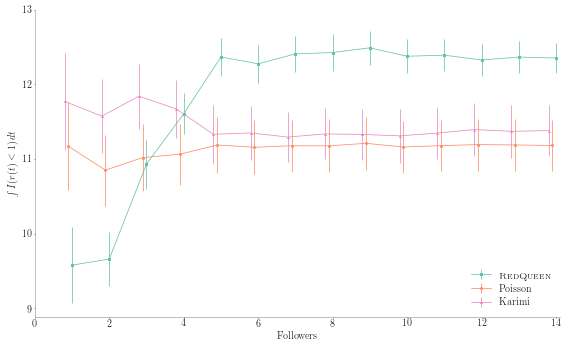

In [111]:
plot_multiple_followers_perf(run_multiple_df=run_multiple_df, measure='top_1', 
                             # file_name='multiple-followers-top-1.pdf',
                             yticks=[9, 10, 11, 12, 13])

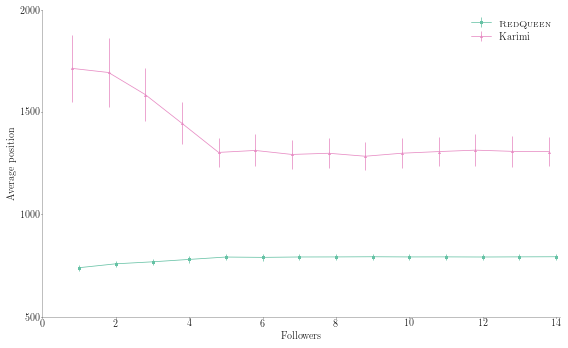

In [116]:
plot_multiple_followers_perf(run_multiple_df=run_multiple_df, measure='avg_rank',
                            # file_name='multiple-followers-average-rank.pdf',
                            yticks=[500, 1000, 1500, 2000])

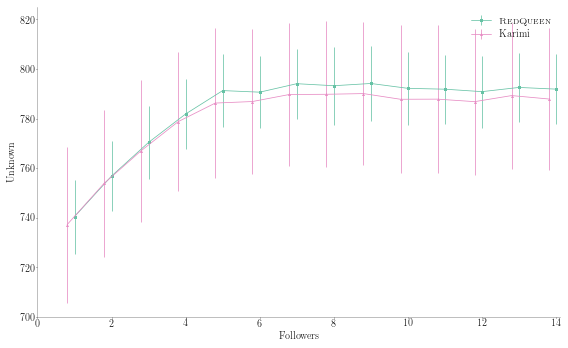

In [117]:
plot_multiple_followers_perf(run_multiple_df=run_multiple_df, measure='num_events')

What is the expected number of broadcasters covered with broadcaster pool = n and follower pool = m?

 - Can do it via simulation
 - Can do it by exact combinatorics

## Overlap between broadcasters

Keep the number of followers fixed at 2, each with 50 broadcasters and one optimal broadcaster. Then increase the overlap among the broadcasters and look at the performance.

In [126]:
def plot_overlapping_perf(run_overlap_df, measure='avg_rank', 
                          yticks=None,
                          file_name=None):
    
    run_multiple_df = run_overlap_df.sort_values(['type', 'overlap'])
    perf_data_grp = run_overlap_df.groupby(['type', 'overlap'])
    perf_mean = perf_data_grp.mean()
    perf_std = perf_data_grp.std()
    
    # plt.figure(figsize=(8,6))
    
    if file_name is None:
        latexify(fig_width=8, largeFonts=True)
    else:
        latexify(fig_width=1.75, largeFonts=False)
    
    overlap = np.asarray(sorted(run_multiple_df.overlap.unique().tolist()))
    c1, c2, c3 = sns.color_palette('Set1', n_colors=3)
    
    plt.errorbar(overlap, perf_mean.loc['Opt'][measure].tolist(), fmt=red_queen_fmt,
                 yerr=perf_std.loc['Opt'][measure].tolist(), label=r'\textsc{RedQueen}',
                 linewidth=0.75, markersize=3, color=red_queen_color)
    
    plt.errorbar(overlap + 0.005, perf_mean.loc['Poisson'][measure].tolist(), fmt=poisson_fmt,
                 yerr=perf_std.loc['Poisson'][measure].tolist(), label='Poisson',
                 linewidth=0.75, markersize=3, color=poisson_color)
    
    plt.errorbar(overlap + 0.01, perf_mean.loc['kdd'][measure].tolist(), fmt=karimi_fmt,
                 yerr=perf_std.loc['kdd'][measure].tolist(), label='Karimi',
                 linewidth=0.75, markersize=3, color=karimi_color)
    
    if file_name is None:
        plt.xlabel('Overlap')

        ylabel = 'Unknown'

        if measure == 'avg_rank':
            ylabel = 'Average position'
            plt.legend(loc='upper right')
        elif measure == 'top_1':
            ylabel = r'$\int I(r(t) < 1)\,dt$'
            plt.legend(loc='lower right')
        else:
            plt.legend()

        plt.ylabel(ylabel)
        
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xlim((0, overlap.max() + 0.02))
    plt.tight_layout()
    format_axes(plt.gca())
    
    if file_name is not None:
        plt.savefig(os.path.join(plot_base, file_name), bbox_inches='tight', pad_inches=0)
    
    

In [121]:
overlap_sim_opts = prepare_overlapping_followees_sim_opts(num_overlap=10, opts=overlap_opts)

In [122]:
import warnings

In [123]:
%%time
num_broadcasters = 50
overlapping_run_opts = Options(overlap_list=range(0, num_broadcasters + 1), num_segments=24, repetitions=100,
                               setup_opts=overlap_opts.set(kind='PiecewiseConst', 
                                                           broadcasters_per_follower=num_broadcasters))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    overlapping_res = run_overlapping_followees(opts=overlapping_run_opts)

*** 2018-03-31 11:54:33.115177 Checkpoint: active/total = 6098/1000, procs = [('Opt', 4100), ('Poisson', 999), ('kdd', 999)]
*** 2018-03-31 11:56:47.823915 Checkpoint: active/total = 7098/2000, procs = [('Opt', 3100), ('Poisson', 1999), ('kdd', 1999)]
*** 2018-03-31 11:58:48.200162 Checkpoint: active/total = 8098/3000, procs = [('Opt', 2100), ('Poisson', 2999), ('kdd', 2999)]
*** 2018-03-31 12:00:33.626718 Checkpoint: active/total = 9098/4000, procs = [('Opt', 1100), ('Poisson', 3999), ('kdd', 3999)]
*** 2018-03-31 12:02:05.704835 Checkpoint: active/total = 10098/5000, procs = [('Opt', 100), ('Poisson', 4999), ('kdd', 4999)]
*** 2018-03-31 12:12:44.444901 Checkpoint: active/total = 9300/6000, procs = [('Opt', 0), ('Poisson', 4639), ('kdd', 4661)]
*** 2018-03-31 12:23:50.473119 Checkpoint: active/total = 8300/7000, procs = [('Opt', 0), ('Poisson', 4140), ('kdd', 4160)]
*** 2018-03-31 12:38:23.870671 Checkpoint: active/total = 7300/8000, procs = [('Opt', 0), ('Poisson', 3640), ('kdd', 36

In [124]:
overlap_df = overlapping_res.df.copy()

In [125]:
def sim_opts_overlap(sim_opts):
    followees = [set([s for s, t in sim_opts.edge_list if t == x]) for x in sim_opts.sink_ids]
    assert len(followees) == 2
    return (len(followees[0].intersection(followees[1])) - 1) / (len(followees[0]) - 1) # len(followees[0].union(followees[1]))

In [127]:
overlap_df['overlap'] = [sim_opts_overlap(x['sim_opts']) for x in overlapping_res.raw_results]

In [128]:
overlap_df.groupby(['type', 'overlap']).mean()

avg_rank  num_events  num_followers    q           r_2  \
type overlap                                                               
Opt  0.00      1254.033670     2505.85            2.0  1.0  2.517349e+04   
     0.02      1252.434394     2505.76            2.0  1.0  2.506377e+04   
     0.04      1251.395308     2503.70            2.0  1.0  2.504060e+04   
     0.06      1251.574592     2501.54            2.0  1.0  2.506442e+04   
     0.08      1249.800340     2495.19            2.0  1.0  2.497974e+04   
     0.10      1253.093386     2502.30            2.0  1.0  2.512201e+04   
     0.12      1251.403023     2501.88            2.0  1.0  2.506588e+04   
     0.14      1252.533378     2500.30            2.0  1.0  2.511743e+04   
     0.16      1252.773870     2500.28            2.0  1.0  2.515505e+04   
     0.18      1251.549904     2497.90            2.0  1.0  2.510176e+04   
     0.20      1252.595110     2500.88            2.0  1.0  2.515811e+04   
     0.22      1250.555901     2497.15            2.0  1.0  2.506842e+04   
     0.24      1197.047597     2390.36            2.0  1.0  2.508675e+04   
     0.26      1252.587131     2497.95            2.0  1.0  2.521721e+04   
     0.28      1252.831044     2498.45            2.0  1.0  2.519594e+04   
     0.30      1252.439679     2500.10            2.0  1.0  2.519788e+04   
     0.32      1249.529288     2494.15            2.0  1.0  2.508599e+04   
     0.34      1249.185017     2493.20            2.0  1.0  2.507339e+04   
     0.36      1250.304731     2496.62            2.0  1.0  2.512540e+04   
     0.38      1250.670676     2494.14            2.0  1.0  2.514025e+04   
     0.40      1249.355560     2495.83            2.0  1.0  2.513381e+04   
     0.42      1249.400233     2494.74            2.0  1.0  2.514018e+04   
     0.44      1250.563524     2495.70            2.0  1.0  2.517512e+04   
     0.46      1250.040359     2490.32            2.0  1.0  2.516428e+04   
     0.48      1248.995207     2490.50            2.0  1.0  2.520251e+04   
     0.50      1247.394875     2496.60            2.0  1.0  2.509083e+04   
     0.52      1247.685904     2490.55            2.0  1.0  2.511552e+04   
     0.54      1247.599163     2494.05            2.0  1.0  2.511347e+04   
     0.56      1245.254046     2487.60            2.0  1.0  2.501767e+04   
     0.58      1248.972293     2492.49            2.0  1.0  2.519986e+04   
...                    ...         ...            ...  ...           ...   
kdd  0.42      2010.865219     2492.58            2.0  1.0  8.280224e+04   
     0.44      2018.378420     2491.91            2.0  1.0  8.333948e+04   
     0.46      2016.470569     2489.03            2.0  1.0  8.311261e+04   
     0.48      2110.000617     2488.99            2.0  1.0  9.667329e+04   
     0.50      2028.462838     2494.30            2.0  1.0  8.485506e+04   
     0.52      2018.178445     2487.06            2.0  1.0  8.322932e+04   
     0.54      2014.426032     2491.42            2.0  1.0  8.298263e+04   
     0.56      2025.516946     2484.19            2.0  1.0  8.465919e+04   
     0.58      2022.999825     2490.81            2.0  1.0  8.397676e+04   
     0.60      2017.724796     2486.85            2.0  1.0  8.359753e+04   
     0.62      2012.950925     2485.06            2.0  1.0  8.307176e+04   
     0.64      2028.635698     2493.78            2.0  1.0  8.524213e+04   
     0.66      2013.842145     2484.67            2.0  1.0  8.306382e+04   
     0.68      2033.710468     2492.51            2.0  1.0  8.538477e+04   
     0.70      2052.698079     2486.60            2.0  1.0  8.845997e+04   
     0.72     11412.333487     2385.32            2.0  1.0  1.111919e+07   
     0.74      2049.436901     2490.83            2.0  1.0  8.762680e+04   
     0.76      2016.724485     2488.88            2.0  1.0  8.355655e+04   
     0.78      2022.780612     2490.53            2.0  1.0  8.408137e+04   
     0.80      2018.374091     2486.55            2.0  1.0  8.3672

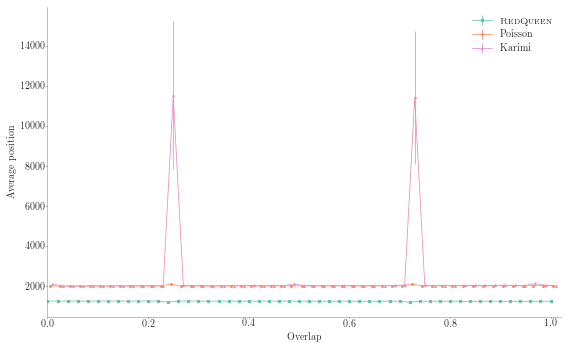

In [129]:
plot_overlapping_perf(overlap_df, measure='avg_rank')

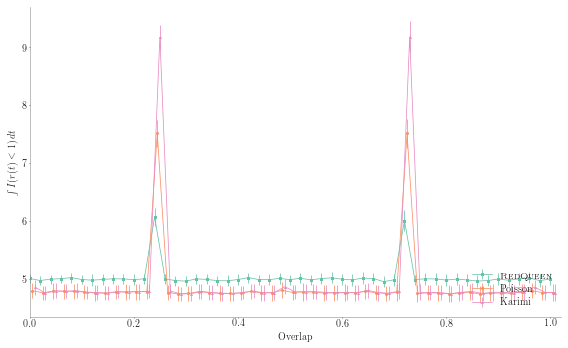

In [130]:
plot_overlapping_perf(overlap_df, measure='top_1')

In [131]:
%run -i redqueen/utils.py
%run -i redqueen/opt_model.py
%run -i redqueen/opt_runs.py

## Testing out significance

In [132]:
sim_opts = SimOpts(src_id=1, 
                  s=np.asarray([1.0, 1.0]),
                  q=1.0, 
                  end_time=100,
                  other_sources=[('Poisson2', {'src_id': 1000, 'seed': 42, 'rate': 10.0}), 
                                 ('Poisson2', {'src_id': 1001, 'seed': 43, 'rate': 10.0})],
                  sink_ids = [5001, 5002],
                  edge_list=[(1, 5001), (1, 5002), (1000, 5001), (1001, 5002)])

In [133]:
%%time
opt_pw_mgr = sim_opts.create_manager_with_significance(1, time_period=10.0, num_segments=24)
opt_pw_mgr.run_dynamic()

opt_mgr = sim_opts.create_manager_with_opt(1)
opt_mgr.run_dynamic()

opt_pw_df = opt_pw_mgr.state.get_dataframe()
opt_df = opt_mgr.state.get_dataframe()

poisson_mgr = sim_opts.create_manager_with_poisson(45, capacity=num_tweets_of(opt_df, sim_opts=sim_opts))
poisson_mgr.run_dynamic()

poisson_df = poisson_mgr.state.get_dataframe()

CPU times: user 383 ms, sys: 40 ms, total: 423 ms
Wall time: 420 ms


In [110]:
print(num_tweets_of(opt_df, sim_opts=sim_opts), 
      num_tweets_of(opt_pw_df, sim_opts=sim_opts),
      num_tweets_of(poisson_df, sim_opts=sim_opts))
print(opt_df.shape, opt_pw_df.shape, poisson_df.shape)

324.0 325.0 312.0
(2592, 5) (2594, 5) (2568, 5)


The optimal and optimal-picewise should have similar performance.

In [111]:
print(time_in_top_k(opt_df, K=1, sim_opts=sim_opts), 
      time_in_top_k(opt_pw_df, sim_opts=sim_opts, K=1), 
      time_in_top_k(poisson_df, sim_opts=sim_opts, K=1))
print(average_rank(opt_df, sim_opts=sim_opts), 
      average_rank(opt_pw_df, sim_opts=sim_opts, K=1), 
      average_rank(poisson_df, sim_opts=sim_opts, K=1))

30.6505733464 29.6750640797 23.6733687659
172.614283682 171.548425075 316.374108601


### Change importance

In [112]:
sim_opts_unequal = sim_opts.update({'s': np.asarray([0.5, 1.5])})

In [113]:
%%time
opt_pw_mgr = sim_opts_unequal.create_manager_with_significance(41, time_period=10.0, num_segments=24)
opt_pw_mgr.run_dynamic()

opt_mgr = sim_opts_unequal.create_manager_with_opt(1)
opt_mgr.run_dynamic()

opt_pw_df = opt_pw_mgr.state.get_dataframe()
opt_df = opt_mgr.state.get_dataframe()

poisson_mgr = sim_opts_unequal.create_manager_with_poisson(4, capacity=num_tweets_of(opt_df, sim_opts=sim_opts))
poisson_mgr.run_dynamic()

poisson_df = poisson_mgr.state.get_dataframe()

CPU times: user 333 ms, sys: 13.3 ms, total: 347 ms
Wall time: 337 ms


In [114]:
print(num_tweets_of(opt_df, sim_opts=sim_opts_unequal), 
      num_tweets_of(opt_pw_df, sim_opts=sim_opts_unequal), 
      num_tweets_of(poisson_df, sim_opts=sim_opts_unequal))
print(opt_df.shape, opt_pw_df.shape, poisson_df.shape)

325.0 323.0 336.0
(2594, 5) (2590, 5) (2616, 5)


In [115]:
print(time_in_top_k(opt_df, K=1, sim_opts=sim_opts), 
      time_in_top_k(opt_pw_df, sim_opts=sim_opts, K=1), 
      time_in_top_k(poisson_df, sim_opts=sim_opts, K=1))
print(average_rank(opt_df, sim_opts=sim_opts), 
      average_rank(opt_pw_df, sim_opts=sim_opts, K=1), 
      average_rank(poisson_df, sim_opts=sim_opts, K=1))

30.6124782772 30.2860675318 24.8904723685
171.651501755 172.651153777 299.409321481


### Setting significance

In [7]:
num_segs = 24
sig = np.square(np.sin(np.arange(0, num_segs, step=1.0) * 4 * np.pi / num_segs))
sig = (sig / sig.sum()).reshape((1, -1))
sim_opts = SimOpts(src_id=1, 
                  s=1.0,
                  q=1.0,
                  end_time=100,
                  other_sources=[('Poisson2', {'src_id': 1000, 'seed': 42, 'rate': 500.0})],
                  sink_ids = [5001],
                  edge_list=[(1, 5001), (1000, 5001)])

In [8]:
%%time
opt_sig_mgr = sim_opts.create_manager_with_significance(seed=10, time_period=sim_opts.end_time, 
                                                        significance=sig)
opt_sig_mgr.run_dynamic()

CPU times: user 4.82 s, sys: 133 ms, total: 4.95 s
Wall time: 4.94 s


In [118]:
df = opt_sig_mgr.state.get_dataframe()

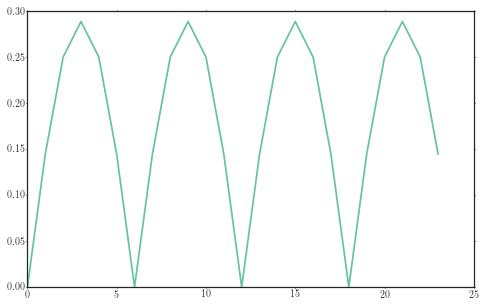

In [850]:
plt.plot(np.sqrt(sig.ravel()))

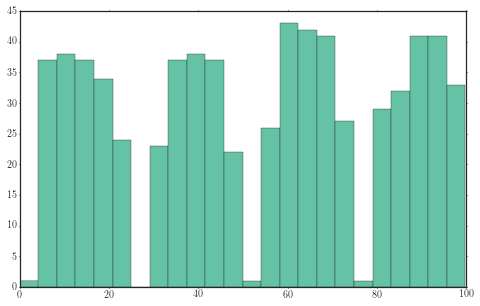

In [853]:
plt.hist(df.t[df.src_id == sim_opts.src_id].unique(), bins=num_segs);

## `s_init` heuristic

In [287]:
sim_opts = SimOpts.std_poisson(world_seed=1, world_rate=500)

In [288]:
sweep_s(lambda: sim_opts, 10, verbose=True, dynamic=True)

*** 2016-05-13 16:06:06.308683 Checkpoint: Initial capacity = 16.682815756349004, target capacity = 10
*** 2016-05-13 16:06:06.515228 Checkpoint: s = 2.0, capcity = 14.461590479654564
*** 2016-05-13 16:06:06.711105 Checkpoint: s = 4.0, capcity = 12.150333853228608
*** 2016-05-13 16:06:06.903814 Checkpoint: s = 8.0, capcity = 10.439782962439807
*** 2016-05-13 16:06:07.116908 Checkpoint: s = 16.0, capcity = 8.877513076274898
*** 2016-05-13 16:06:07.118326 Checkpoint: s_hi = 16.0, s_lo = 8.0
*** 2016-05-13 16:06:07.335871 Checkpoint: new_capacity = 9.554880390811231, s = 12.0


12.0

In [289]:
opt_mgr = sim_opts.update({ 's': 0.375 }).create_manager_with_opt(seed=1)
opt_mgr.run_dynamic()

In [290]:
opt_df = opt_mgr.state.get_dataframe()

In [291]:
opt_df[opt_df.src_id == sim_opts.src_id]

,event_id,sink_id,src_id,t,time_delta
0,100,1001,1,0.000000,0.000000
4,104,1001,1,0.002940,0.000070
32,132,1001,1,0.035653,0.001081
49,149,1001,1,0.077264,0.005290
60,160,1001,1,0.104315,0.001089
89,189,1001,1,0.155652,0.002980
105,205,1001,1,0.190397,0.001760
118,218,1001,1,0.214218,0.002258
137,237,1001,1,0.258508,0.001389
149,249,1001,1,0.275824,0.005616


In [292]:
wall_mgr = sim_opts.create_manager_for_wall()

In [293]:
wall_mgr.run_dynamic()

In [294]:
df = wall_mgr.state.get_dataframe()

In [295]:
r_t = rank_of_src_in_df(df, src_id=-1)

In [296]:
r_t.mean(1).iloc[-1]

495.0

In [297]:
df.shape

(495, 5)

In [298]:
(4 * (r_t.iloc[-1].mean() ** 2) * (sim_opts.end_time) ** 2) / (np.pi * np.pi * (10 + 1) ** 4) 

6.7826577479581491

In [60]:
hawkes_res.raw_results[-1
                      ]

{'avg_rank': 954.00681957353299,
 'broadcaster_events': 49,
 'num_events': 49,
 'r0_num_events': 49,
 'r_2': 13966.614080745609,
 's': 1000.0,
 'seed': 2,
 'sim_opts': <__main__.SimOpts at 0x7fc80895c358>,
 'top_1': 9.5668178314961985,
 'top_10': 52.303469506298647,
 'top_20': 90.47790271111036,
 'top_3': 20.567177074149754,
 'top_5': 30.583811352029109,
 'type': 'Oracle',
 'world_events': 1198}

In [58]:
[x['best_avg_k'] for x in hawkes_res.raw_results if x['type'] == 'KDD']

[]

# Run for user 52885404

In [124]:
import os

In [12]:
%run -i redqueen/read_real_data.py
%run -i redqueen/utils.py
%run -i redqueen/opt_model.py
%run -i redqueen/opt_runs.py

In [13]:
base = '/NL/redqueen/work/opt-broadcast/'

In [14]:
user_id = 20712572

In [15]:
# user_id = 35652801 s_opt = 3211150360.2065687
# s_opt = 155655.86986992834 for user_id = 52885404
user_raw = pickle.load(open(os.path.join(base, 'user-{}.pickle'.format(user_id)), 'rb'))

In [16]:
user_result = revert_to_sim_opts(user_raw)

In [17]:
user_raw.keys()

dict_keys(['num_user_events', 'sim_opts_dict', 'user_id', 'user_event_times', 'scaled_period'])

In [18]:
sim_opts = user_result['sim_opts']

In [140]:
%%time
q_opt = sweep_q(sim_opts, user_raw['num_user_events'], verbose=True)

*** 2018-03-29 15:41:10.277148 Checkpoint: q_init = 23432203434.13262
*** 2018-03-29 15:42:03.589664 Checkpoint: Initial capacity = 28.884668978257146, target capacity = 30, q_init = 23432203434.13262
*** 2018-03-29 15:42:56.022663 Checkpoint: q = 11716101717.06631, capacity = 35.03962393774085
*** 2018-03-29 15:42:56.024860 Checkpoint: q_hi = 23432203434.13262, q_lo = 11716101717.06631
*** 2018-03-29 15:43:49.334111 Checkpoint: new_capacity = 31.287997490988705, q = 17574152575.599464
*** 2018-03-29 15:44:42.311992 Checkpoint: new_capacity = 29.89889301924032, q = 20503178004.866043


In [11]:
q_opt

20503178004.866043

In [19]:
opt_mgr = sim_opts.update({'q': q_opt}).create_manager_with_opt(seed=1)

In [20]:
%%time
opt_mgr.run_dynamic()

CPU times: user 42.5 s, sys: 1.12 s, total: 43.6 s
Wall time: 43.6 s


In [21]:
df_opt = opt_mgr.state.get_dataframe()

In [22]:
user_id, sim_opts.src_id

(20712572, 20712572)

In [23]:
real_mgr = sim_opts.update({'q': q_opt}).create_manager_with_times(event_times=user_result['user_event_times'])

In [24]:
%%time
real_mgr.run_dynamic()

CPU times: user 8.61 s, sys: 1.2 s, total: 9.81 s
Wall time: 9.8 s


In [25]:
df_real = real_mgr.state.get_dataframe()

In [26]:
df_opt.event_id[df_opt.src_id == user_id].nunique()

32

In [27]:
df_real.event_id[df_real.src_id == user_id].nunique()

30

In [30]:
kdd_perf = worker_kdd((1, user_result['num_user_events'] * 1.0, 60, sim_opts, None, None), verbose=True, Ks=[1])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
# seed, capacity, num_segments, sim_opts, world_changing_rates, queue = params
kdd_perf = worker_kdd((1, user_result['num_user_events'] * 1.0, 60, sim_opts, None, None), verbose=True, Ks=[1])

kdd_opt = kdd_perf['kdd_opt_1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
r_opt = rank_of_src_in_df(df_opt, user_id).mean(1)

In [ ]:
r_real = rank_of_src_in_df(df_real, user_id).mean(1)

In [1239]:
r_opt.shape

(606525,)

In [1240]:
r_opt_sampled = pd.concat([r_opt[::200], r_opt[r_opt == 0]]).sort_index()

In [1241]:
np.sum(r_opt == 0)

32

In [1242]:
df_real.t[df_real.src_id == user_id].unique()

array([  251.906,   441.235,   455.121,   886.766,  1413.65 ,  1429.583,
        1700.907,  2508.858,  2509.022,  2706.411,  3645.805,  3648.546,
        3993.621,  4269.935,  4305.957,  4306.243,  4309.272,  4313.168,
        4325.23 ,  4662.313,  5412.7  ,  5415.166,  5790.916,  5791.006,
        5799.317,  5809.817,  6078.444,  6099.087,  6207.644,  6854.717])

In [1243]:
r_real[(886.76 <= r_real.index) & (r_real.index <= 886.77)]

t
886.762619    775.066667
886.766353      0.016667
dtype: float64

In [1244]:
r_real[(r_real == 0)].index

Float64Index([ 251.90598865, 441.235439068, 455.120594385, 1413.64994026,
              1700.90725806, 2508.85790024, 2509.02217742, 3645.80533154,
              3993.62119176,  4269.9354092, 4305.95691458, 4306.24253286,
              4309.27232676, 4313.16830944,  4325.2296147, 4662.31332139,
              5412.69974612, 5415.16577061, 5790.91621864, 5791.00582437,
              5799.31675627, 5809.81742832, 6207.64448925, 6854.71736858],
             dtype='float64', name='t')

In [1245]:
r_real_sampled = pd.concat([r_real[::200], r_real[r_real == 0]]).sort_index()

The average rank of user among his followers.

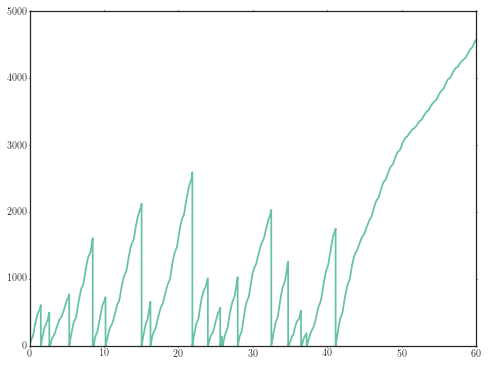

In [1246]:
latexify(fig_width=2.0, largeFonts=True)
plt.figure(figsize=(8,6))
plt.plot(60 * r_real_sampled.index / 10000, r_real_sampled.values)

In [1247]:
c1, c2, c3, c4 = sns.mpl_palette('Set2', 4)

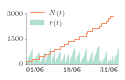

In [1470]:
latexify(fig_width=1.75, largeFonts=False)
# plt.figure(figsize=(8,6))
# plt.plot(60 * r_opt_sampled.index / 10000, r_opt_sampled.values, color=c1, linewidth=0.75)
one_month = r_opt_sampled.index <= 5000.0
ymin, ymax = 0, 3000

plt.fill_between(60 * r_opt_sampled.index[one_month] / 10000, r_opt_sampled.values[one_month], color=c1,
                 label=r'$\bar{r}(t)$',
                 alpha=0.5)

tweet_times = df_opt[(df_opt.src_id == sim_opts.src_id)].t.unique()
one_month_df = tweet_times < 5000.0
num_tweets = np.sum(one_month_df)

# plt.vlines(tweet_times[one_month_df] * 60 / 10000, ymin=0, ymax=1200, color=c2, linewidth=0.5)
plt.step(tweet_times[one_month_df] * 60 / 10000.0, np.arange(num_tweets) / num_tweets * ymax, 
         label='$N(t)$',
         color=c2, linewidth=1.0)

# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(0.5, 1.2), bbox_transform=plt.gca().transAxes)

plt.yticks([0, 1500, 3000])
# plt.yticks([])
plt.xticks([3, 15, 27], ['01/06', '15/06', '31/06'])
plt.tight_layout()
format_axes(plt.gca())
plt.gca().xaxis.set_ticks_position('none')
# plt.savefig(os.path.join(plot_base, 'opt-data-counting.pdf'), bbox_inches='tight', pad_inches=0)

In [1465]:
tweet_times

array([], dtype=float64)

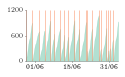

In [898]:
latexify(fig_width=1.75, largeFonts=False)
# plt.figure(figsize=(8,6))
# plt.plot(60 * r_opt_sampled.index / 10000, r_opt_sampled.values, color=c1, linewidth=0.75)
one_month = r_opt_sampled.index <= 5000.0
plt.fill_between(60 * r_opt_sampled.index[one_month] / 10000, r_opt_sampled.values[one_month], color=c1, alpha=0.5)

tweet_times = df_opt[(df_opt.src_id == user_id)].t.unique()
one_month_df = tweet_times < 5000.0
ymin, ymax = 0, 1200
plt.vlines(tweet_times[one_month_df] * 60 / 10000, ymin=0, ymax=1200, color=c2, linewidth=0.5)
plt.yticks([0, 600, 1200])
plt.xticks([3, 15, 27], ['01/06', '15/06', '31/06'])
plt.tight_layout()
format_axes(plt.gca())
# plt.savefig(os.path.join(plot_base, 'opt-data-ranks.pdf'), bbox_inches='tight', pad_inches=0)

In [899]:
np.sum(one_month_df)

20

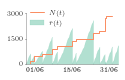

In [1469]:
latexify(fig_width=1.75, largeFonts=False)
# plt.figure(figsize=(8,6))
# plt.plot(60 * r_opt_sampled.index / 10000, r_opt_sampled.values, color=c1, linewidth=0.75)
one_month = r_real_sampled.index <= 5000.0
plt.fill_between(60 * r_real_sampled.index[one_month] / 10000, r_real_sampled.values[one_month], 
                 label=r'$\bar{r}(t)$', color=c1, alpha=0.5)

tweet_times = df_real[(df_real.src_id == sim_opts.src_id)].t.unique()
one_month_df = tweet_times < 5000.0
num_tweets = np.sum(one_month_df)
ymin, ymax = 0, 3000
# plt.vlines(tweet_times[one_month_df] * 60 / 10000, ymin=0, ymax=1200, color=c2, linewidth=0.5)
plt.step(tweet_times[one_month_df] * 60 / 10000.0, np.arange(num_tweets) / num_tweets * ymax, color=c2,
         label=r'$N(t)$',
         linewidth=1.0)

plt.yticks([0, 1500, 3000])
plt.xticks([3, 15, 27], ['01/06', '15/06', '31/06'])
# leg = plt.legend(loc="upper left")

# Get the bounding box of the original legend
# bb = leg.legendPatch.get_bbox().inverse_transformed(plt.gca().transAxes)
# leg.legendPatch.
plt.legend(bbox_to_anchor=(0.5, 1.2), bbox_transform=plt.gca().transAxes)

plt.tight_layout()
format_axes(plt.gca())
plt.gca().xaxis.set_ticks_position('none')
# plt.savefig(os.path.join(plot_base, 'real-data-counting.pdf'), bbox_inches='tight', pad_inches=0)

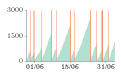

In [902]:
latexify(fig_width=1.75, largeFonts=False)
# plt.figure(figsize=(8,6))
# plt.plot(60 * r_real_sampled.index / 10000, r_real_sampled.values)
one_month = r_real_sampled.index <= 5000.0
plt.fill_between(60 * r_real_sampled.index[one_month] / 10000, r_real_sampled.values[one_month], color=c1, alpha=0.5)

tweet_times = df_real[(df_real.src_id == sim_opts.src_id)].t.unique()
one_month_df = tweet_times < 5000.0
plt.vlines(tweet_times[one_month_df] * 60 / 10000.0, ymin=0, ymax=3000, color=c2, linewidth=0.5)
plt.tight_layout()
plt.yticks([0, 1500, 3000]) # , [0, r'$10^3$', r'$3\times 10^3$'])
plt.xticks([3, 15, 27], ['01/06', '15/06', '31/06'])
format_axes(plt.gca())
# plt.savefig(os.path.join(plot_base, 'real-data-ranks.pdf'), bbox_inches='tight', pad_inches=0)

In [903]:
np.sum(one_month_df)

20

In [963]:
hs = get_user_repository()

In [1363]:
expr_times = get_start_end_time()
scaling_factor = (expr_time.end_time - expr_time.start_time) / scaled_period
# num_segments = 6
# real_segment_len =  (60 * 60 * 24 / 6)

num_segments = 7
real_segment_len = 60 * 60 * 24

user_significance = find_significance(
    user_id=sim_opts.src_id, 
    user_repository=hs,
    num_segments=num_segments,
    segment_length=real_segment_len,
    return_tweet_times=True
)

sig_opts = Deco.Options(num_segments=num_segments, 
                        segment_length=real_segment_len / scaling_factor,
                        start_time=0)

In [1364]:
sig = user_significance.significance

In [1365]:
sig.shape

(30, 7)

Distribution of significance among the followers.

(array([ 13.,  25.,  22.,  31.,  17.,   9.,  24.]),
 array([ 0.   ,  0.857,  1.714,  2.571,  3.429,  4.286,  5.143,  6.   ]),
 <a list of 7 Patch objects>)

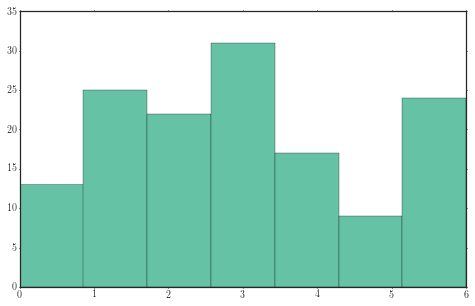

In [1366]:
plt.hist(convert_to_bins([x for x in hs.get_user_tweets(sim_opts.src_id) if x < expr_times.start_time], 
                         start_time=expr_times.start_time, 
                         num_segments=num_segments,
                         segment_length=real_segment_len), 
         bins=7)

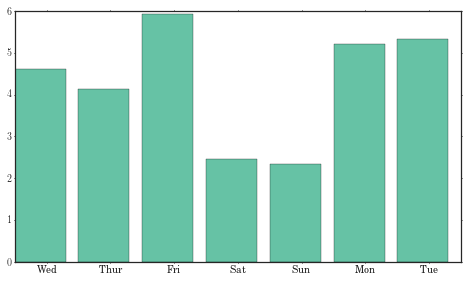

In [1368]:
plt.figure(figsize=(8,4.5))
plt.bar(range(num_segments), (user_significance.significance.sum(0)))
plt.xticks(np.arange(0.5, num_segments + 0.5), ['Wed', 'Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue']);

This is what the distribution of tweewts looked like without any significance.

In [1281]:
from datetime import datetime

In [1282]:
datetime.utcfromtimestamp

<function datetime.utcfromtimestamp>

In [1288]:
days = [datetime.utcfromtimestamp(x).weekday() for y in user_significance.all_tweet_times for x in y]

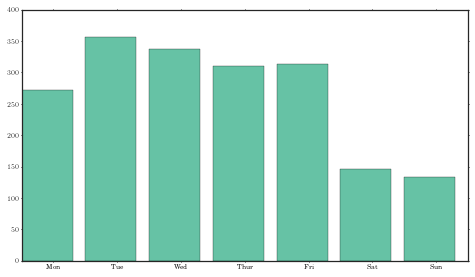

In [1291]:
plt.figure(figsize=(8,4.5))
plt.bar(range(num_segments), np.bincount(days))
plt.xticks(np.arange(0.5, num_segments + 0.5), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);

In [1037]:
df_opt.t[df_opt.src_id == sim_opts.src_id].unique() 

array([    0.   ,   341.478,   726.068,  1026.144,  1337.371,  1551.147,
        1864.017,  2095.041,  2313.458,  2644.116,  2905.501,  3268.387,
        3343.043,  3590.779,  3948.662,  4071.397,  4371.113,  4463.008,
        4568.638,  4715.002,  5201.879,  5719.893,  6063.347,  6171.623,
        6346.155,  6619.573,  6952.219,  7394.048,  7598.194,  8061.934,
        8700.188,  9633.311])

In [1038]:
sig_opts.segment_length

161.29032258064518

In [1040]:
convert_to_bins(df_opt.t[df_opt.src_id == sim_opts.src_id].unique(), opts=sig_opts)

time_period = 1129.0322580645163


array([0, 2, 4, 6, 1, 2, 4, 5, 0, 2, 4, 6, 6, 1, 3, 4, 6, 6, 0, 1, 4, 0, 2,
       3, 4, 6, 1, 3, 5, 0, 4, 3])

time_period = 1129.0322580645163


(array([ 5.,  4.,  4.,  4.,  7.,  2.,  6.]),
 array([ 0.   ,  0.857,  1.714,  2.571,  3.429,  4.286,  5.143,  6.   ]),
 <a list of 7 Patch objects>)

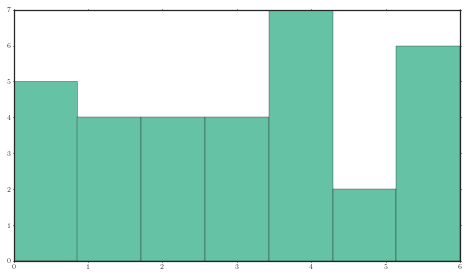

In [1041]:
plt.figure(figsize=(8,4.5))
plt.hist(convert_to_bins(df_opt.t[df_opt.src_id == sim_opts.src_id].unique(), opts=sig_opts), bins=num_segments)

The rank of the user in the feeds of his followers (in reality)

In [1042]:
average_rank(df_opt, sim_opts=sim_opts) / sim_opts.end_time

422.95381261988513

In [547]:
average_rank(df_real, sim_opts=sim_opts) / sim_opts.end_time

1387.4009282506947

In [940]:
user_id, sim_opts.src_id

(20712572, 20712572)

In [1043]:
len(sim_opts.sink_ids)

30

In [1369]:
%%time
s_opt_sig = sweep_s_with_significance(
    sim_opts=sim_opts.update({ 'q_vec': sig }), 
    capacity_cap=df_real.event_id[df_real.src_id == sim_opts.src_id].nunique(),
    time_period=(7 * 24 * 60 * 60) / scaling_factor,
    parallel=True,
    verbose=True,
    s_init=3374237294515.0977
)

*** 2016-08-05 16:22:23.631316 Checkpoint: Initial capacity = 31.08, target capacity = 30, s_init = 2999322039568.9756
*** 2016-08-05 16:23:37.398815 Checkpoint: s = 5998644079137.951, capacity = 26.28
*** 2016-08-05 16:23:37.399612 Checkpoint: s_hi = 5998644079137.951, s_lo = 2999322039568.9756
*** 2016-08-05 16:24:54.201172 Checkpoint: new_capacity = 28.16, s = 4498983059353.463
*** 2016-08-05 16:26:09.619781 Checkpoint: new_capacity = 28.88, s = 3749152549461.219
*** 2016-08-05 16:27:23.752828 Checkpoint: new_capacity = 29.84, s = 3374237294515.0977
CPU times: user 797 ms, sys: 51.8 s, total: 52.6 s
Wall time: 6min 16s


This is the value that `s` should have for running with significance.

In [1384]:
s_opt_sig

3374237294515.0977

In [1370]:
sig_mgr = sim_opts.update({ 's': s_opt_sig, 'q_vec': sig }).create_manager_with_significance(
    seed=878,
    time_period=(7 * 24 * 60 * 60) / scaling_factor
)

In [1371]:
%%time
sig_mgr.run_dynamic()

CPU times: user 54.9 s, sys: 2.1 s, total: 57 s
Wall time: 56 s


In [1372]:
df_sig = sig_mgr.state.get_dataframe()
r_sig = rank_of_src_in_df(df_sig, sim_opts.src_id).mean(1)

In [1373]:
convert_to_bins(df_sig.t[df_sig.src_id == sim_opts.src_id].unique(), opts=sig_opts)

array([0, 1, 2, 6, 0, 0, 2, 5, 6, 1, 1, 3, 5, 6, 1, 2, 3, 0, 1, 2, 4, 6, 2,
       6, 1, 2, 4, 6, 4])

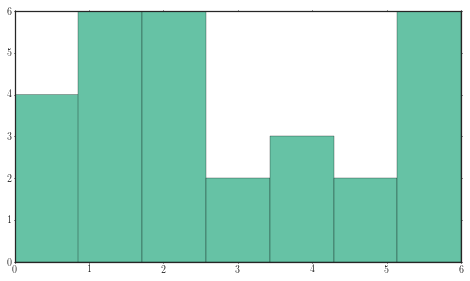

In [1374]:
plt.figure(figsize=(8,4.5))
expr_time = get_start_end_time()


plt.hist(convert_to_bins(df_sig.t[df_sig.src_id == sim_opts.src_id].unique(), opts=sig_opts),
         bins=num_segments);

In [1375]:
r_sig_sampled = pd.concat([r_sig[::200], r_sig[r_sig == 0]]).sort_index()

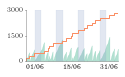

In [1468]:
latexify(fig_width=1.75, largeFonts=False)
# latexify(fig_width=8, largeFonts=True)
# plt.figure(figsize=(8,6))
# plt.plot(60 * r_opt_sampled.index / 10000, r_opt_sampled.values, color=c1, linewidth=0.75)
one_month = r_sig_sampled.index <= 5000.0
ymin, ymax = 0, 3000

plt.fill_between(60 * r_sig_sampled.index[one_month] / 10000, r_sig_sampled.values[one_month], color=c1,
                 label=r'$\bar{r}(t)$',
                 alpha=0.5)

tweet_times = df_sig[(df_sig.src_id == sim_opts.src_id)].t.unique()
one_month_df = tweet_times < 5000.0
num_tweets = np.sum(one_month_df)

# plt.vlines([7, 14, 21, 28], ymin=0, ymax=3000, color=c3, linewidth=0.75)
# plt.vlines(range(30), ymin=0, ymax=3000, color=c4, linewidth=0.5)

# Marking out the weekends.
plt.fill_between([3, 5], [ymax, ymax], color=c3, alpha=0.25)
plt.fill_between([10, 12], [ymax, ymax], color=c3, alpha=0.25)
plt.fill_between([17, 19], [ymax, ymax], color=c3, alpha=0.25)
plt.fill_between([24, 26], [ymax, ymax], color=c3, alpha=0.25)

plt.step(tweet_times[one_month_df] * 60 / 10000.0, np.arange(num_tweets) / num_tweets * ymax, 
         label='$N(t)$',
         color=c2, linewidth=1.0)

# plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.5, 1.2), bbox_transform=plt.gca().transAxes)

plt.yticks([0, 1500, 3000])
plt.xticks([3, 15, 27], ['01/06', '15/06', '31/06'])
plt.tight_layout()
format_axes(plt.gca())
plt.gca().xaxis.set_ticks_position('none')
# plt.savefig(os.path.join(plot_base, 'sig-data-counting.pdf'), bbox_inches='tight', pad_inches=0)

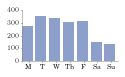

In [1407]:
# plt.figure(figsize=(8,4.5))
latexify(fig_width=1.75, largeFonts=False)
plt.bar(range(num_segments), (user_significance.raw_significance.sum(0))[[5, 6, 0, 1, 2, 3, 4]], color=c3, linewidth=0)
plt.xticks(np.arange(0.5, num_segments + 0.5), ['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']);
plt.yticks([0, 100, 200, 300, 400])
plt.tight_layout()
format_axes(plt.gca())
plt.savefig(os.path.join(plot_base, 'sig-week-day.pdf'), bbox_inches='tight', pad_inches=0)

In [1378]:
average_rank(df_opt[df_opt.t < 5000], end_time=5000, sim_opts=sim_opts) / sim_opts.end_time * 2

389.45432613518233

In [1379]:
average_rank(df_sig[df_sig.t < 5000], end_time=5000, sim_opts=sim_opts) / sim_opts.end_time * 2

425.25265231631306

In [1380]:
average_rank(df_real[df_real.t < 5000], end_time=5000, sim_opts=sim_opts) / sim_opts.end_time * 2

698.0467206055821

In [1381]:
df_opt[(df_opt.src_id == sim_opts.src_id) & (df_opt.t < 5000.0)].event_id.nunique()

20

In [1382]:
df_sig[(df_sig.src_id == sim_opts.src_id) & (df_sig.t < 5000.0)].event_id.nunique()

20

In [1383]:
df_real[(df_real.src_id == sim_opts.src_id) & (df_sig.t < 5000.0)].event_id.nunique()

20

In [1415]:
r_sig[r_sig.index < 5000].max()

1431.0

In [1416]:
r_opt[r_opt.index < 5000].max()

1085.1666666666667

In [1418]:
r_real[r_real.index < 5000].max()

2597.9000000000001